In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./data/student_clustering.csv')
print(df.shape)
df.head()

(200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


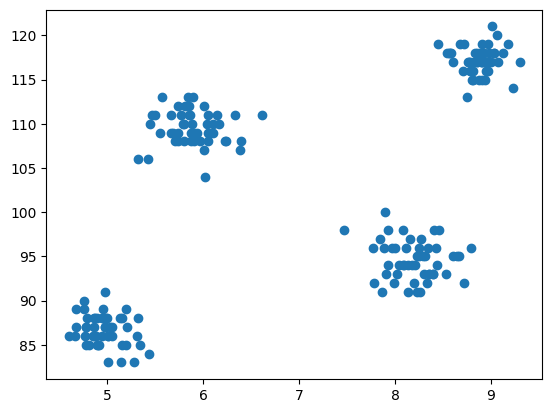

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'])

In [4]:
from sklearn.cluster import KMeans

In [5]:
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters= i)
  km.fit_predict(df)
  wcss.append(km.inertia_)

In [6]:
print(wcss)

[29957.898287999997, 4184.14127, 2364.0055834200834, 681.96966, 587.7764274703558, 428.840576, 367.14599763624346, 289.9508880167452, 234.5315488622212, 193.32393224026788]


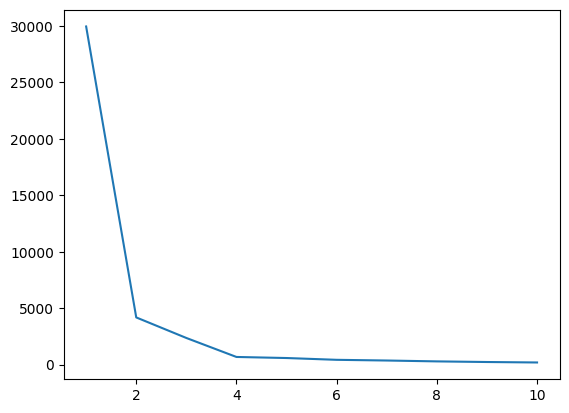

In [7]:
import matplotlib.pyplot as plt 
plt.plot(range(1,11),wcss)

In [8]:
x = df.iloc[:,:].values
km = KMeans(n_clusters = 4)
y_means = km.fit_predict(x)

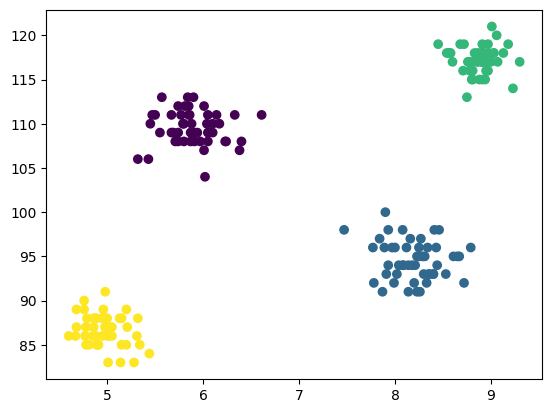

In [10]:
plt.scatter(df['cgpa'],df['iq'],c=y_means)

In [11]:
from sklearn.datasets import make_blobs
centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

x,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers = centroids,n_features=3,random_state=1)

In [13]:
x[:10]

array([[ 4.33424548,  3.32580419, -4.17497018],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237,  2.6984613 ],
       [ 6.90465871,  6.1110567 , -4.3409502 ],
       [-2.60839207,  2.95015551, -2.2346649 ],
       [ 5.88490881,  4.12271848, -5.86778722],
       [-4.68484061, -4.15383935,  4.14048406],
       [-1.82542929,  3.96089238, -3.4075272 ],
       [-5.34385368, -4.95640314,  4.37999916],
       [ 4.91549197,  4.70263812, -4.582698  ]])

In [23]:
import plotly.express as px
fig = px.scatter_3d(x=x[:,0],y = x[:,1],z = x[:,2])
fig.show()

In [17]:
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit_predict(x)
  wcss.append(km.inertia_)

In [18]:
print(wcss)

[11143.784324503362, 4122.409557603533, 2163.2694504362976, 593.2516262404545, 559.4506753071314, 502.3179081944118, 484.2288662024264, 425.3905764020092, 395.59412484916754, 412.6815271249484]


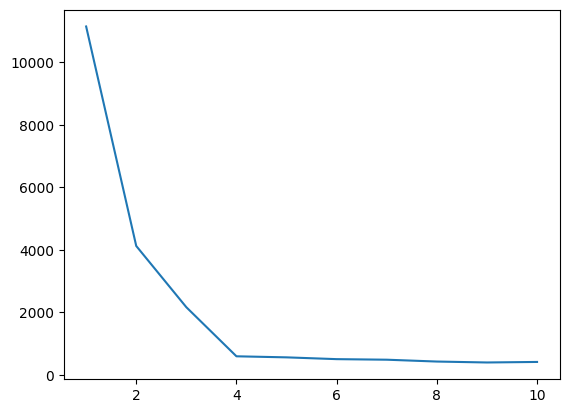

In [19]:
plt.plot(range(1,11),wcss)

In [20]:
km = KMeans(4)
k_pred = km.fit_predict(x)

In [24]:
px.scatter_3d(x = x[:,0],y = x[:,1],z = x[:,2],color = k_pred)